In [29]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

In [3]:
city_file = "/Users/michaelmanthey/Documents/Bootcamp/Module_5_Python_Matplotlib/Resources/city_data.csv"
ride_file = "/Users/michaelmanthey/Documents/Bootcamp/Module_5_Python_Matplotlib/Resources/ride_data.csv"

# import data into dfs
city_data_df = pd.read_csv(city_file)
ride_data_df = pd.read_csv(ride_file)

ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [12]:
# inspect data for null values and get dtypes

# city_data_df.isnull().sum()
# ride_data_df.isnull().sum()

# city_data_df.dtypes
#ride_data_df.dtypes

# get unique values of type of city
#city_data_df["type"].unique()

# get count of each area type
sum(city_data_df["type"] == "Rural")

18

In [13]:
# merge dfs
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
#create dataframes for each type of city
urban_city_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_city_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_city_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
#rural_city_df

In [17]:
# get total number of rides from each city type
urban_ride_count = urban_city_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_city_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_city_df.groupby(["city"]).count()["ride_id"]

In [20]:
# get average fare by city within type
urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_city_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_city_df.groupby(["city"]).mean() ["fare"]

In [27]:
# get average number of drivers for each city type
urban_avg_drivers = urban_city_df.groupby(["city"]).mean() ["driver_count"]
suburban_avg_drivers = suburban_city_df.groupby(["city"]).mean() ["driver_count"]
rural_avg_drivers = rural_city_df.groupby(["city"]).mean() ["driver_count"]

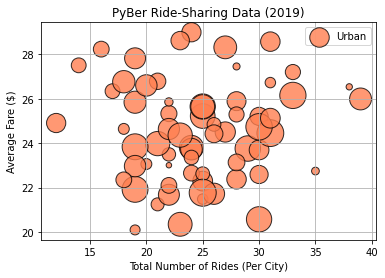

In [37]:
#build scatter plots for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_avg_drivers,
            color = "coral",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

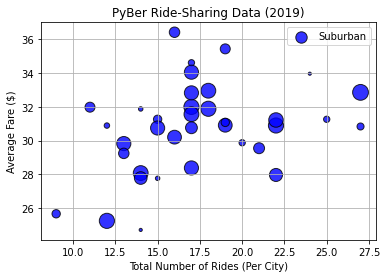

In [38]:
#create scatter plot for suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_avg_drivers,
            color = "coral",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

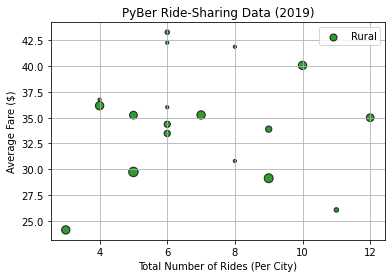

In [39]:
# create scatter plot for rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_avg_drivers,
            color = "green",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

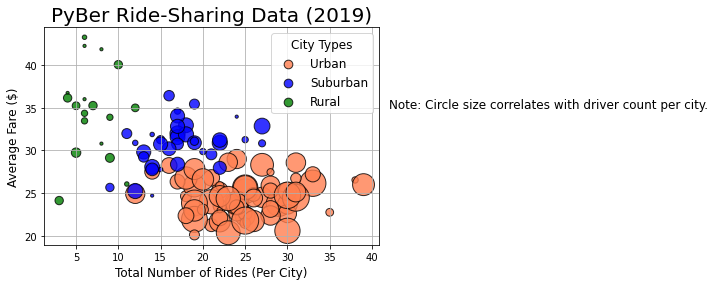

In [46]:
# combine scatter plots
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_avg_drivers,
            color = "coral",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_avg_drivers,
            color = "blue",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_avg_drivers,
            color = "green",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("/Users/michaelmanthey/Documents/Bootcamp/Module_5_Python_Matplotlib/Resources/Fig1.png")

#plt.show()


In [52]:
# get summary stats
#urban_city_df.describe()
#suburban_city_df.describe()
#rural_city_df.describe()

#urban_ride_count.describe()
#suburban_ride_count.describe()
#rural_ride_count.describe()

In [67]:
# Calculate the mean of the ride count for each city type.

#round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)
#urban_ride_count.median()
#suburban_ride_count.mode()

import numpy as np
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([6]), count=array([5])).


In [75]:
# Get the fares for the urban cities.
urban_fares = urban_city_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

# Get the fares for the suburban cities.
suburban_fares = suburban_city_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

# Get the fares for the rural cities.
rural_fares = rural_city_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [76]:
# Get the driver count data from the city types.
urban_drivers = urban_city_df['driver_count']
suburban_drivers = suburban_city_df['driver_count']
rural_drivers = rural_city_df['driver_count']

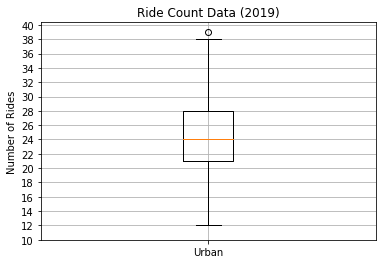

In [77]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

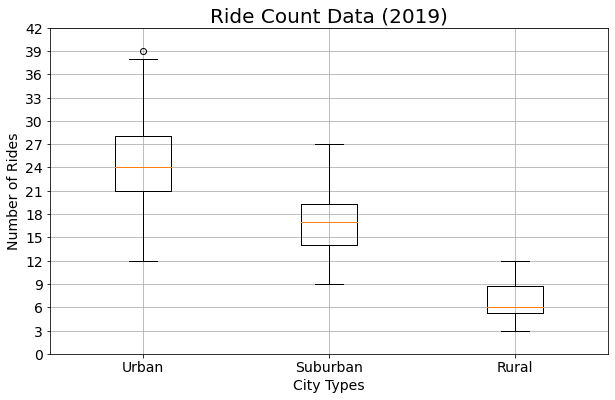

In [92]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("/Users/michaelmanthey/Documents/Bootcamp/Module_5_Python_Matplotlib/Resources/Fig2.png")
plt.show()

In [80]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


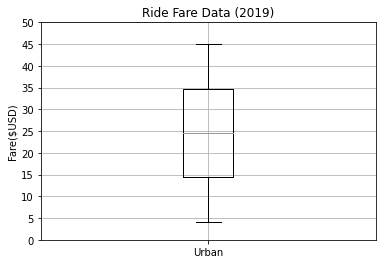

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [81]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

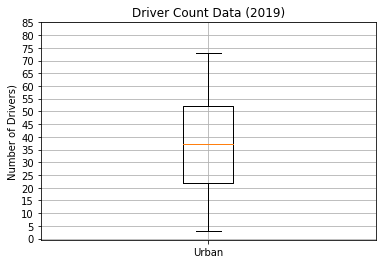

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [83]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [84]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [85]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [86]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

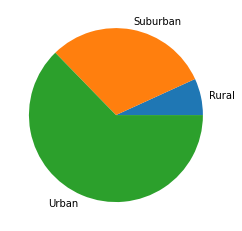

In [87]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

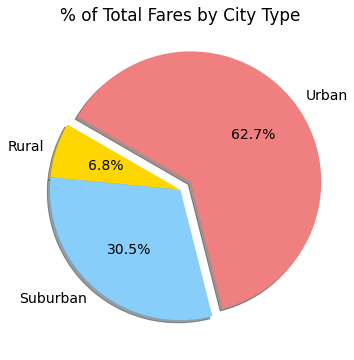

In [93]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("/Users/michaelmanthey/Documents/Bootcamp/Module_5_Python_Matplotlib/Resources/Fig3.png")
# Show Figure
plt.show()

In [91]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

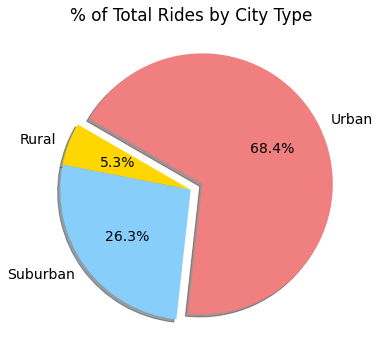

In [94]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("/Users/michaelmanthey/Documents/Bootcamp/Module_5_Python_Matplotlib/Resources/Fig4.png")
# Show Figure
plt.show()

In [96]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

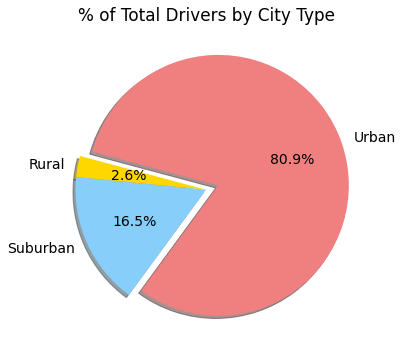

In [97]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("/Users/michaelmanthey/Documents/Bootcamp/Module_5_Python_Matplotlib/Resources/Fig5.png")
# Show Figure
plt.show()